In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# # prevent from sleeping
# import requests
# import time

# while True:
#     try:
#         requests.get('https://www.google.com')
#         print("Kept alive.")
#     except:
#         print("Failed to keep alive.")
#     time.sleep(600)

In [110]:
# # increase available memory
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse

In [111]:
%cd drive/MyDrive/cits3001_project/reinforcement-learning

[Errno 2] No such file or directory: 'drive/MyDrive/cits3001_project/reinforcement-learning'
/content/drive/MyDrive/cits3001_project/reinforcement-learning


In [112]:
%pwd

'/content/drive/My Drive/cits3001_project/reinforcement-learning'

In [113]:
!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip
!sudo apt install freeglut3-dev
!sudo apt install python3.7-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.7 is already the newest version (3.7.17-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
There is only one alternative in link group python3 (providing /usr/bin/python3): /usr/bin/python3.7
Nothing to configure.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-6).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.7-distutils is already the newest version (3.7.17-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and

In [114]:
!python --version

Python 3.7.17


In [115]:
!pip install gym_super_mario_bros==7.3.0 nes_py
!pip install gym==v0.21.0
!pip install stable-baselines3==1.5.0
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [116]:
!pip show gym_super_mario_bros

Name: gym-super-mario-bros
Version: 7.3.0
Summary: Super Mario Bros. for OpenAI Gym
Home-page: https://github.com/Kautenja/gym-super-mario-bros
Author: Christian Kauten
Author-email: kautencreations@gmail.com
License: Proprietary
Location: /usr/local/lib/python3.7/dist-packages
Requires: nes-py
Required-by: 


In [117]:
# import sys
# sys.path.append('/usr/local/lib/python3.7/dist-packages')
# #import the game
import gym
import gym_super_mario_bros
import os
# #import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# #import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
# from wrappers import SkipFrame, ResizeObservation
from matplotlib import pyplot as plt

In [118]:
####################################################################
# Set up game environment and simplify actions
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# sample the ['right'] and ['right', 'A'] actions
MY_MOVEMENT = SIMPLE_MOVEMENT[1:3]
env = JoypadSpace(env, MY_MOVEMENT)
# env = JoypadSpace(env, SIMPLE_MOVEMENT)

# Skip frames
# env = SkipFrame(env, skip=4)

# Grayscale environment
env = GrayScaleObservation(env, keep_dim=True)

# Resize observation
# env = ResizeObservation(env, shape=84)

# Create a vectorized wrapper for an environment
env = DummyVecEnv([lambda: env])

# Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [119]:
###################################################################
# Train and save the training process
###################################################################
# class TrainAndSaveCallback(BaseCallback):

#     def __init__(self, check_freq, save_path, verbose=1):
#         super(TrainAndSaveCallback, self).__init__(verbose)
#         self.check_freq = check_freq
#         self.save_path = save_path

#     def _init_callback(self):
#         if self.save_path is not None:
#             os.makedirs(self.save_path, exist_ok=True)

#     def _on_step(self):
#         if self.n_calls % self.check_freq == 0:
#             model_path = os.path.join(
#                 self.save_path, 'best_model_{}'.format(self.n_calls))
#             self.model.save(model_path)

#         return True


# DATA_DIR = './train/'
# LOG_DIR = './logs/'

# callback = TrainAndSaveCallback(check_freq=1000, save_path=DATA_DIR)
# model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR,
#             learning_rate=0.000005, n_steps=512)
# model.learn(4000000, callback=callback)

# model.save('test-model')

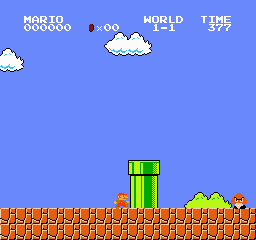

KeyboardInterrupt: ignored

In [120]:
#####################################################################
# Load the training result
#####################################################################
from IPython.display import clear_output, display
from PIL import Image
import numpy as np

model = PPO.load('./train/best_model_1000')
state = env.reset()
while True:
    action, _ = model.predict(state)
    print(MY_MOVEMENT[action[0]])
    state, reward, done, info = env.step(action)
    # Show the game on the screen
    img = env.render(mode='rgb_array')

    # Display image with IPython; clear last iPython display on create
    display(Image.fromarray(np.array(img), 'RGB'), clear=True)

In [ ]:
#####################################################################
# Testing the game
#####################################################################
# state = env.reset()
# state, reward, done, info = env.step([1])
# state, reward, done, info = env.step([1])
# state, reward, done, info = env.step([1])
# plt.figure(figsize=(15,12))
# for idx in range(state.shape[3]):
#     plt.subplot(1,4,idx+1)
#     plt.imshow(state[0][:,:,idx])
# plt.show()


# print(env.step(1)[1])
# print(state.shape)
# plt.imshow(state[0])
# plt.show()

# print(env.observation_space.shape)

# from IPython.display import clear_output, display
# from PIL import Image
# import numpy as np

# # Create a flag - restart or not
# done = True
# # Loop through each frame in the game
# for step in range(100000):
#     # Start the game to begin with
#     if done:
#         # Start the gamee
#         env.reset()
#     # Do random actions
#     state, reward, done, info = env.step(env.action_space.sample())
#     # Show the game on the screen
#     img = env.render(mode='rgb_array')

#     # Display image with IPython; clear last iPython display on create
#     display(Image.fromarray(np.array(img), 'RGB'), clear=True)

# # Close the game
# env.close()